In [1]:
import sys
# Hay que ejecutar esta línea antes de importar el módulo.
sys.path.append("C:/Users/poker/PycharmProjects/tgpy")
# Ahora se puede importar el módulo.
import tgpy as tg
from matplotlib import pyplot as plt
%reload_ext tgpy

In [2]:
npriors = 3 # 1, 2, 3, 4
ngroups = 4 # any positive int
nparams = 1000 # number of chains
nitersSGD = 300

### SVGD

In [67]:
niters = 500 # number of iterations
nreview = 20 # number of review
rprior= 0
rgroup = 0
#nparams = 200

  0%|                                                                                                         …

  0%|                                                                                                         …

  0%|                                                                                                         …

  0%|                                                                                                         …

  0%|                                                                                                         …

  0%|                                                                                                         …

  0%|                                                                                                         …

  0%|                                                                                                         …

  0%|                                                                                                         …

  0%|                                                                                                         …

  0%|                                                                                                         …

  0%|                                                                                                         …

  0%|                                                                                                         …

  0%|                                                                                                         …

  0%|                                                                                                         …

  0%|                                                                                                         …

  0%|                                                                                                         …

  0%|                                                                                                         …

  0%|                                                                                                         …

  0%|                                                                                                         …

  0%|                                                                                                         …

  0%|                                                                                                         …

  0%|                                                                                                         …

  0%|                                                                                                         …

  0%|                                                                                                         …

  0%|                                                                                                         …

  0%|                                                                                                         …

  0%|                                                                                                         …

  0%|                                                                                                         …

  0%|                                                                                                         …

  0%|                                                                                                         …

  0%|                                                                                                         …

  0%|                                                                                                         …

  0%|                                                                                                         …

  0%|                                                                                                         …

  0%|                                                                                                         …

  0%|                                                                                                         …

  0%|                                                                                                         …

  0%|                                                                                                         …

  0%|                                                                                                         …

  0%|                                                                                                         …

  0%|                                                                                                         …

  0%|                                                                                                         …

  0%|                                                                                                         …

  0%|                                                                                                         …

  0%|                                                                                                         …

  0%|                                                                                                         …

  0%|                                                                                                         …

  0%|                                                                                                         …

  0%|                                                                                                         …

  0%|                                                                                                         …

  0%|                                                                                                         …

  0%|                                                                                                         …

  0%|                                                                                                         …

  0%|                                                                                                         …

  0%|                                                                                                         …

  0%|                                                                                                         …

  0%|                                                                                                         …

  0%|                                                                                                         …

  0%|                                                                                                         …

  0%|                                                                                                         …

  0%|                                                                                                         …

  0%|                                                                                                         …

  0%|                                                                                                         …

  0%|                                                                                                         …

  0%|                                                                                                         …

  0%|                                                                                                         …

  0%|                                                                                                         …

  0%|                                                                                                         …

  0%|                                                                                                         …

  0%|                                                                                                         …

  0%|                                                                                                         …

  0%|                                                                                                         …

  0%|                                                                                                         …

  0%|                                                                                                         …

  0%|                                                                                                         …

  0%|                                                                                                         …

  0%|                                                                                                         …

  0%|                                                                                                         …

  0%|                                                                                                         …

  0%|                                                                                                         …

  0%|                                                                                                         …

  0%|                                                                                                         …

  0%|                                                                                                         …

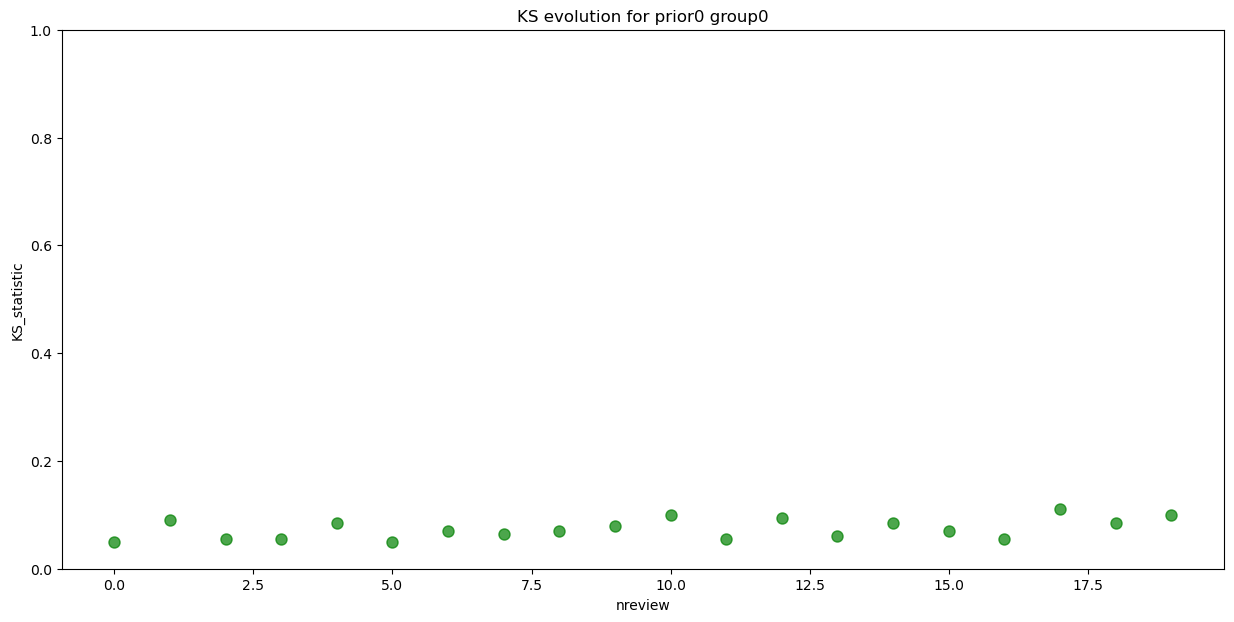

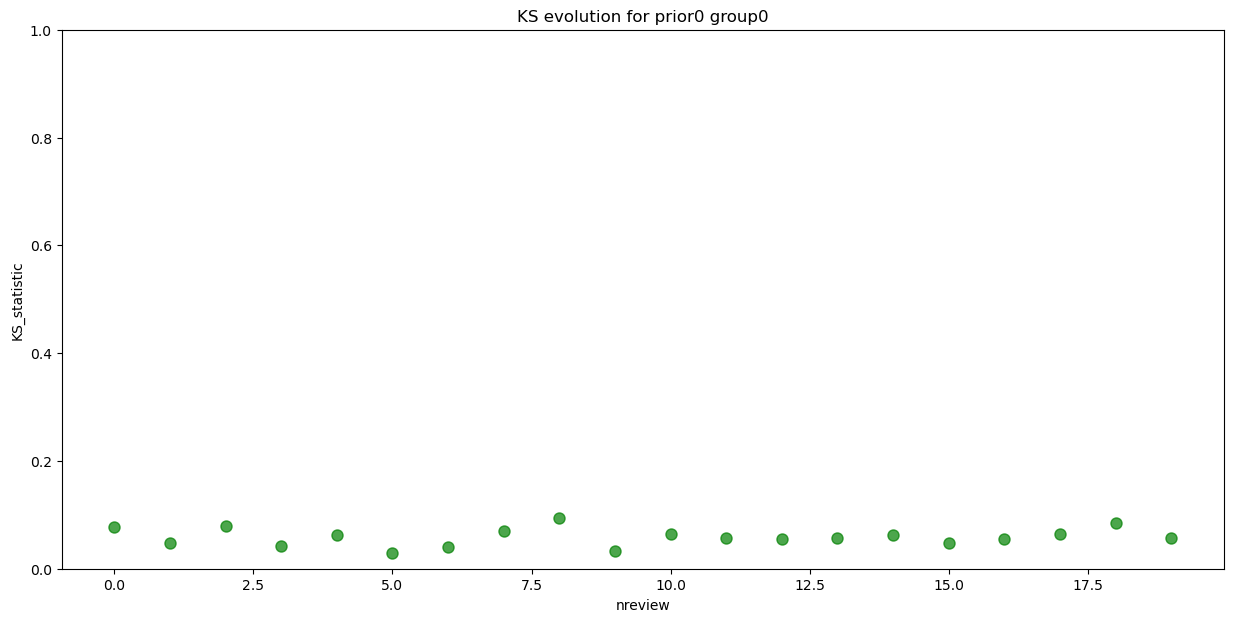

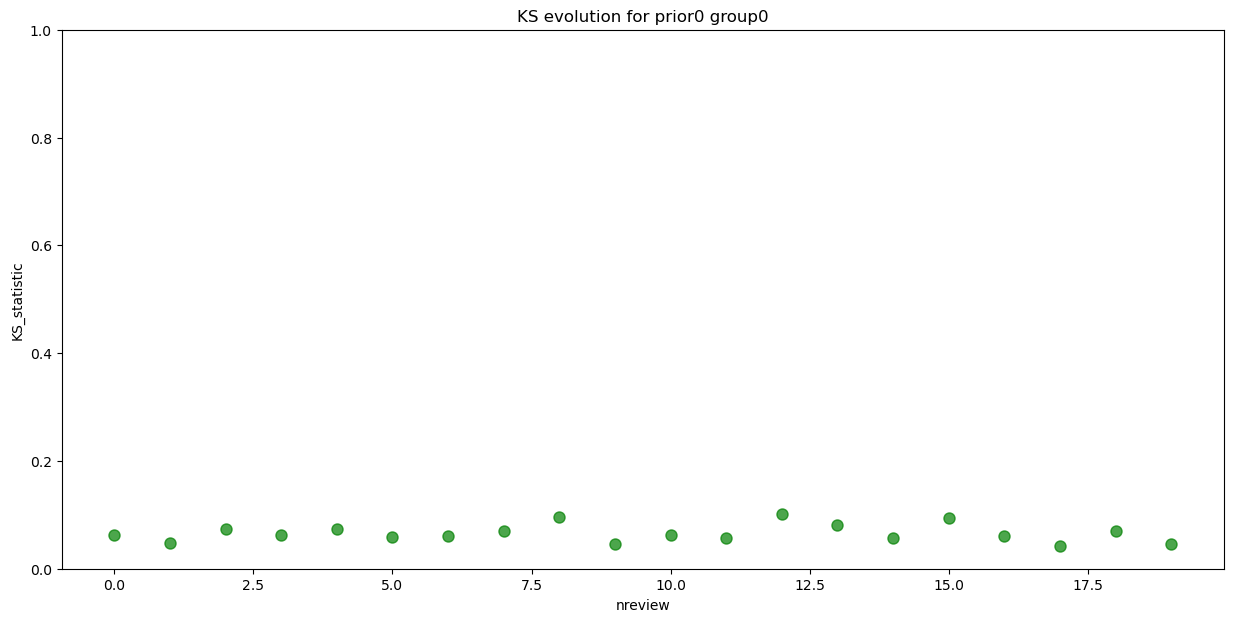

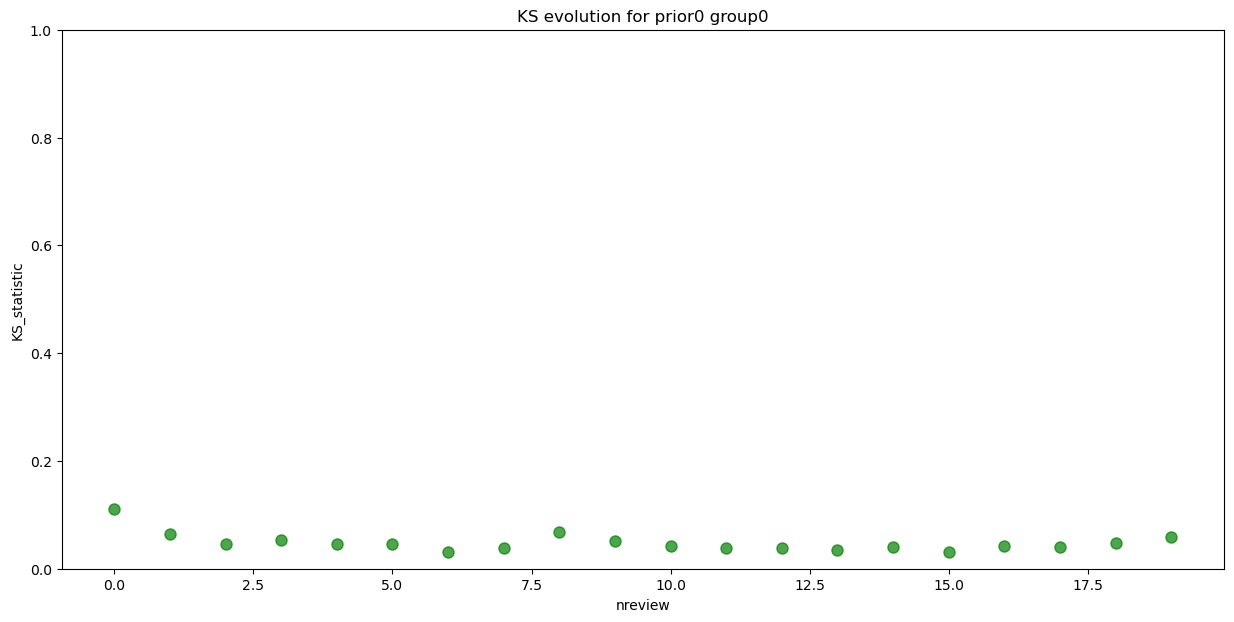

In [68]:
learning_dict = {}
for n in range(4):
    nparams = 200 * (n+1)
    
    #Generar los priors
    prior0 = tg.TgPrior('prior0', ['g{}'.format(i) for i in range(ngroups)], dim=nparams, 
                   low=-4, high=4, alpha=5, beta=5) # simetrico
    prior1 = tg.TgPrior('prior1', ['g{}'.format(i) for i in range(ngroups)], dim=nparams, 
                       low=-1, high=10, alpha=2, beta=3) # masa a la izquierda
    prior2 = tg.TgPrior('prior2', ['g{}'.format(i) for i in range(ngroups)], dim=nparams, 
                       low=-10, high=1, alpha=2, beta=1) # masa a la derecha
    prior3 = tg.TgPrior('prior3', ['g{}'.format(i) for i in range(ngroups)], dim=nparams, 
                       low=-4, high=4, alpha=0.5, beta=0.5) # doble masa


    if npriors == 1: 
        k = tg.DummyKernel(prior0)
    elif npriors == 2:
        k = tg.DummyKernel(prior0, prior1)
    elif npriors == 3:
        k = tg.DummyKernel(prior0, prior1, prior2) 
    else:
        k = tg.DummyKernel(prior0, prior1, prior2, prior3) 


    cov = tg.CovarianceTransport(k, noise=None)
    tgp = tg.TGP([cov], dt=None, annealing=0)
    
    tgp.sample_priors()
    sample_theo = tgp.get_priors(npriors=npriors, ngroups=ngroups)
    # moda
    learning = tg.TgLearning(tgp, lr=0.1)
    learning.execute_sgd(nitersSGD)
    
    # Guardar los datos de la grafica
    review_dict = learning.review(niters=niters, nreview=nreview, rprior=rprior, rgroup=rgroup) 
    #learning_data.append(learning.plotKSEvolution(theorical=sample_theo, review_dict=review_dict, rprior=rprior, rgroup=rgroup, showplot=False))
    learning_dict['params{}'.format(nparams)] = learning.plotKSEvolution(theorical=sample_theo, review_dict=review_dict, rprior=rprior, rgroup=rgroup, showplot=False)

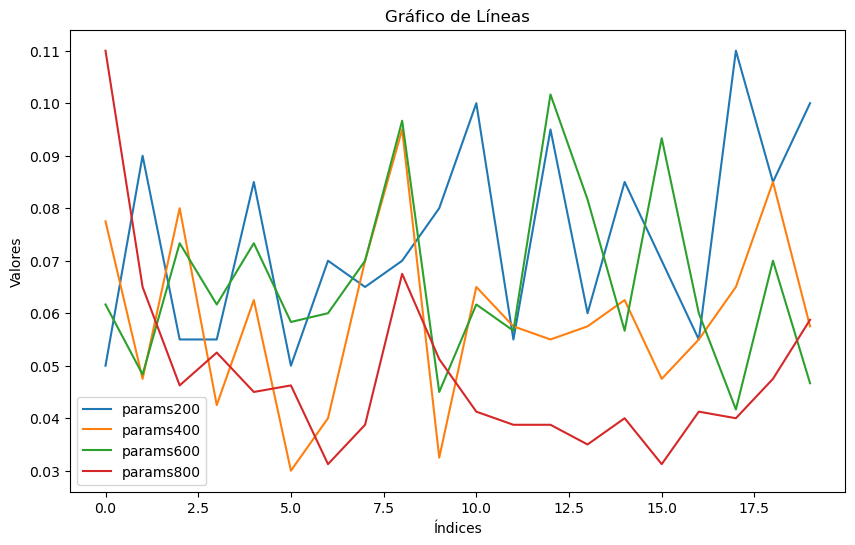

In [69]:
data = learning_dict.values()
x_indices = list(range(len(list(data)[0]))) 
#colors = ['blue', 'green', 'red', 'purple']
plt.figure(figsize=(10, 6))

for i, serie in enumerate(data):
    #plt.plot(x_indices, serie, 'go', color=colors[i], label=list(learning_dict.keys())[i])
    #plt.plot(x_indices, serie, marker='o', color=colors[i], label=list(learning_dict.keys())[i])
    plt.plot(x_indices, serie, label=list(learning_dict.keys())[i])

plt.xlabel('Índices')
plt.ylabel('Valores')
plt.title('Gráfico de Líneas')
plt.legend()
plt.show()